In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Wars by Region and Type: CoW vs UCDP/PRIO

The Correlates of War (CoW) and UCDP/PRIO are the two most dominant data sources for conflict and peace researchers. They follow different methods to record conflicts, and record information according to different data organization schemas. However, both track much of the same information for conflicts. Here, you can see how the two datasets compare in tracking conflicts according to their type and where they occur.

Some differences of note: 

- CoW has war data from 1816 - 2007, while UCDP/PRIO has war data from 1946 - 2018.
- CoW only tracks conflicts that result in over 1,000 deaths per year, while UCDP/PRIO tracks conflicts that result in over 25 deaths per year - but records whether that conflict resulted in over 1,000 deaths per year. For the purpose of comparison, only conflicts with 1,000 deaths per year are plotted
- CoW tracks 4 types of war: inter-state, intra-state, extra-state, and non-state. UCDP/PRIO does not track non-state conflict, and they divide intra-state war into two categories: intrastate and internationalized intrastate (extra-state corresponds to extrasystemic). Furthermore, CoW and UCDP/PRIO have different definitions for what is considered an intrastate vs extrastate war.

In [2]:
cow_regions_toplot = pd.read_csv("./cow_regions_areaplot_data.csv")
cow_type_toplot = pd.read_csv("./cow_type_areaplot_data.csv")
ucdp_regions_toplot = pd.read_csv("./ucdp_regions_areaplot_data.csv")
ucdp_type_toplot = pd.read_csv("./ucdp_type_areaplot_data.csv")

In [3]:
cow_regions_toplot_trimmed = cow_regions_toplot[cow_regions_toplot['year'] > 1945]
cow_type_toplot_trimmed = cow_type_toplot[cow_regions_toplot['year'] > 1945]

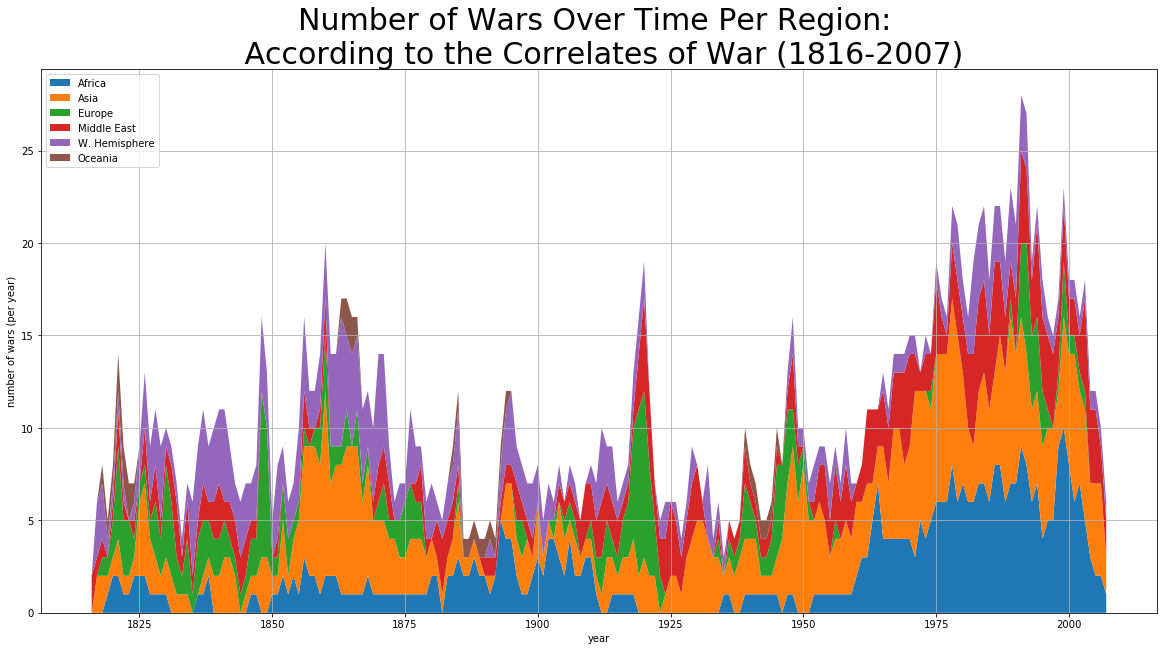

In [38]:
plt.rcParams["figure.figsize"] = (20,10)
plt.stackplot(cow_regions_toplot['year'], cow_regions_toplot['Africa'], cow_regions_toplot['Asia'], cow_regions_toplot['Europe'], 
              cow_regions_toplot['Middle East'], cow_regions_toplot['W. Hemisphere'], cow_regions_toplot['Oceania'], 
             labels=['Africa', 'Asia', 'Europe', 'Middle East', 'W. Hemisphere', 'Oceania'])
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('year')
plt.ylabel('number of wars (per year)')
plt.title('Number of Wars Over Time Per Region: \n According to the Correlates of War (1816-2007)', size='30')
plt.savefig("../Figures/wars-per-region_cow.png")
plt.show()

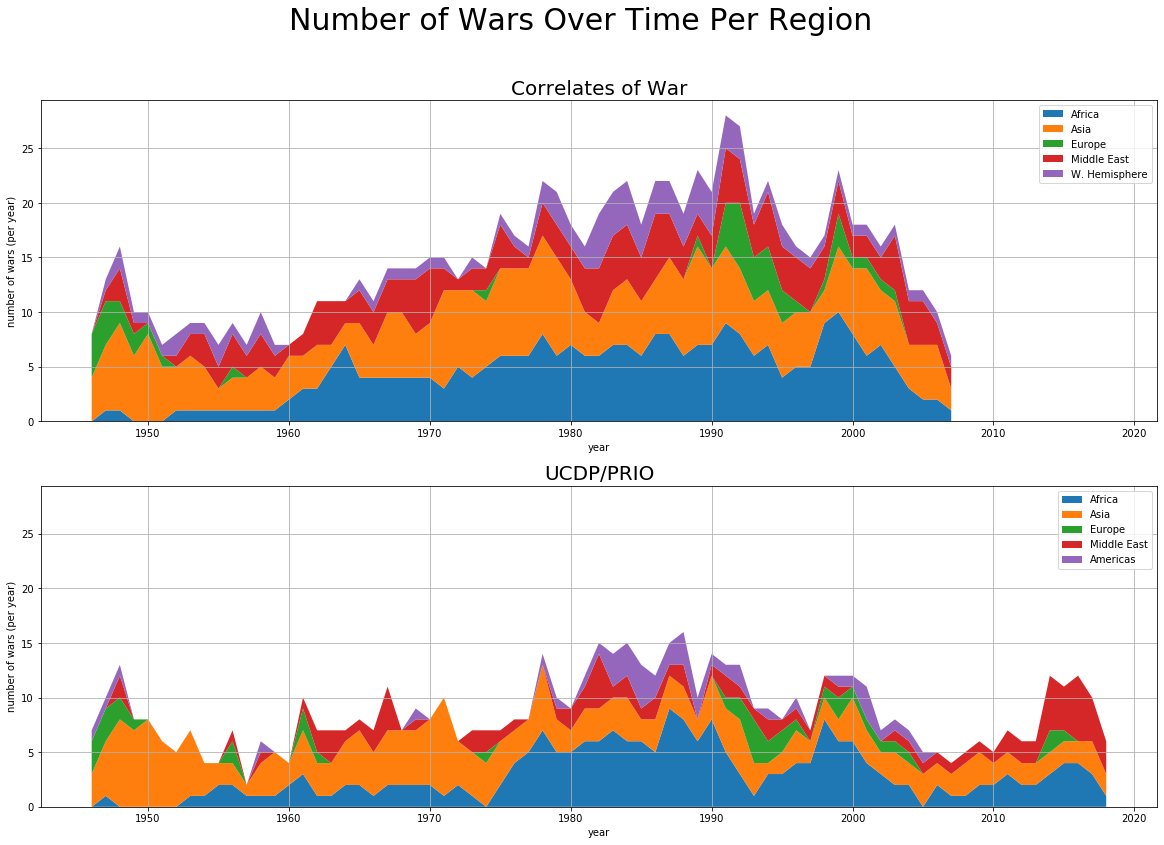

In [39]:
plt.rcParams["figure.figsize"] = (20,13)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True)
ax1.stackplot(cow_regions_toplot_trimmed['year'], cow_regions_toplot_trimmed['Africa'], 
              cow_regions_toplot_trimmed['Asia'], cow_regions_toplot_trimmed['Europe'], 
              cow_regions_toplot_trimmed['Middle East'], cow_regions_toplot_trimmed['W. Hemisphere'], 
             labels=['Africa', 'Asia', 'Europe', 'Middle East', 'W. Hemisphere'])
ax2.stackplot(ucdp_regions_toplot['year'], ucdp_regions_toplot['Africa'], ucdp_regions_toplot['Asia'], 
              ucdp_regions_toplot['Europe'], ucdp_regions_toplot['Middle East'], ucdp_regions_toplot['Americas'], 
              labels=['Africa', 'Asia', 'Europe', 'Middle East', 'Americas'])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.grid()
ax2.grid()
ax1.set_title('Correlates of War', size=20)
ax2.set_title('UCDP/PRIO', size=20)
ax1.set_xlabel('year')
ax1.tick_params(labelbottom=True)
ax2.set_xlabel('year')
ax1.set_ylabel('number of wars (per year)')
ax2.set_ylabel('number of wars (per year)')
plt.suptitle('Number of Wars Over Time Per Region', size='30')
plt.savefig("../Figures/wars-per-region_cow-v-ucdp.png")
plt.show()

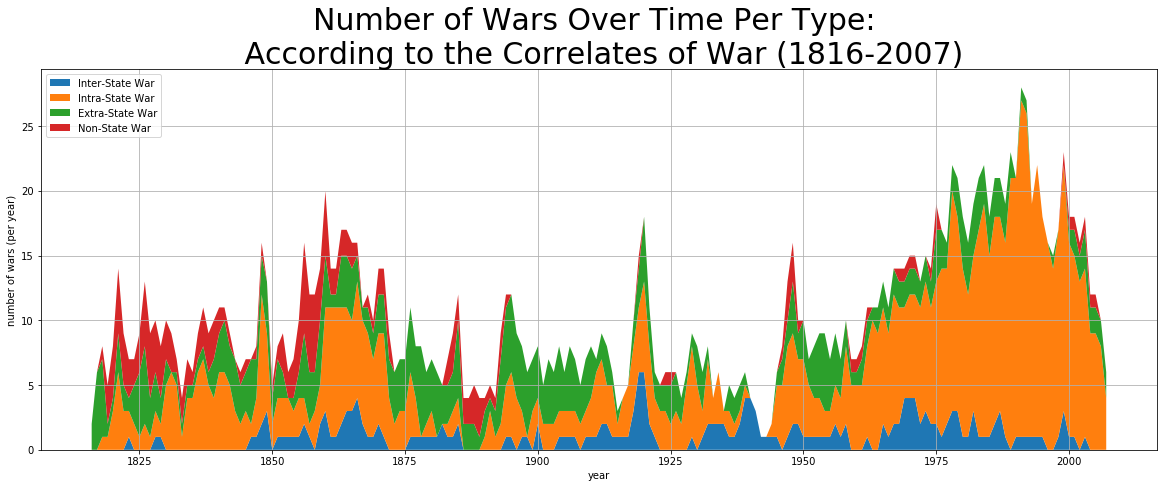

In [36]:
plt.rcParams["figure.figsize"] = (20,7)
plt.stackplot(cow_type_toplot['year'], cow_type_toplot['Inter-State War '], cow_type_toplot['Intra-State War '], 
              cow_type_toplot['Extra-State War '], cow_type_toplot['Non-State War '], 
             labels=['Inter-State War', 'Intra-State War', 'Extra-State War', 'Non-State War'])
plt.legend(loc='upper left')
plt.grid()
plt.xlabel('year')
plt.ylabel('number of wars (per year)')
plt.title('Number of Wars Over Time Per Type: \n According to the Correlates of War (1816-2007)', size=30)
plt.show()

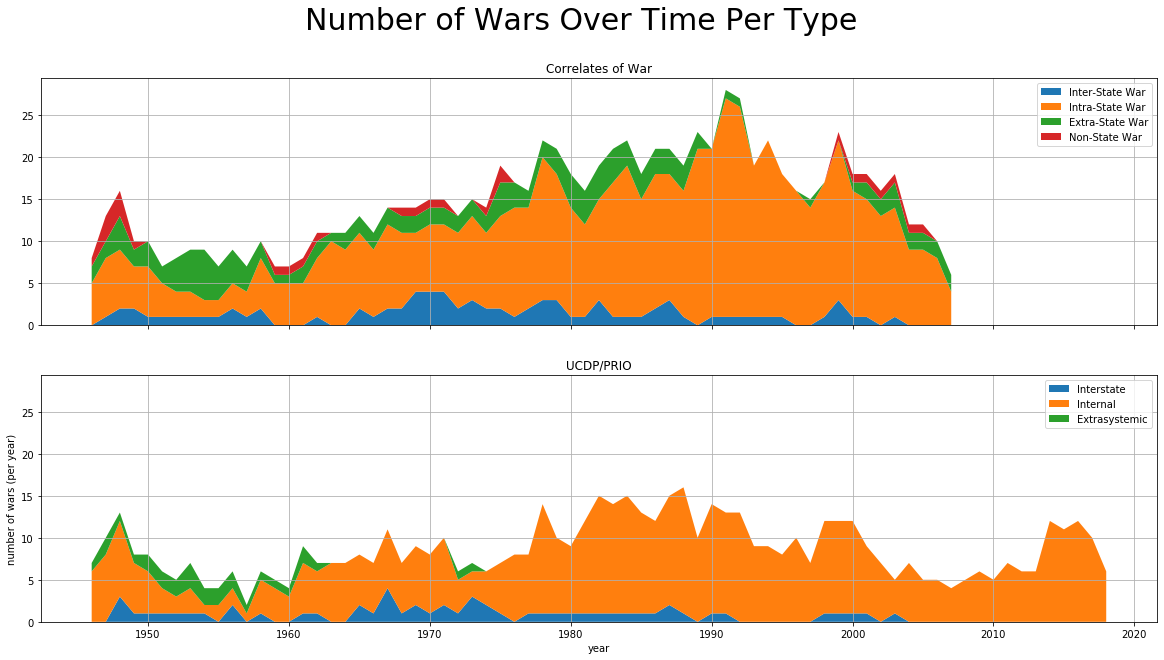

In [37]:
plt.rcParams["figure.figsize"] = (20,10)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True,)
ax1.stackplot(cow_type_toplot_trimmed['year'], cow_type_toplot_trimmed['Inter-State War '], 
              cow_type_toplot_trimmed['Intra-State War '], cow_type_toplot_trimmed['Extra-State War '], 
              cow_type_toplot_trimmed['Non-State War '], labels=['Inter-State War', 'Intra-State War', 'Extra-State War', 'Non-State War'])
ax2.stackplot(ucdp_type_toplot['year'], ucdp_type_toplot['Interstate'], ucdp_type_toplot['Internal'], 
              ucdp_type_toplot['Extrasystemic'], labels=['Interstate', 'Internal', 'Extrasystemic'])

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax1.grid()
ax2.grid()
ax1.set_title('Correlates of War')
ax2.set_title('UCDP/PRIO')
plt.xlabel('year')
plt.ylabel('number of wars (per year)')
plt.suptitle('Number of Wars Over Time Per Type', size='30')
plt.show()

This last plot really makes clear some of the war type coding differences between CoW and UCDP/PRIO. It is likely that wars being recorded as "Extra-State" in CoW are being recorded as "Internal" in UCDP/PRIO